In [ ]:
!pip install tensorflow

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np

# 깃허브에서 데이터를 가져옴
!git clone http://github.com/taehojo/data.git

Data_set = np.loadtxt('./data/ThoraricSurgery3.csv', delimiter = ',')

X = Data_set[:, 0:16]
y = Data_set[:, 16]

model = Sequential()
model.add(Dense(30, input_dim = 16, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
history = model.fit(X, y, epochs = 5, batch_size = 16)




fatal: destination path 'data' already exists and is not an empty directory.
Epoch 1/5
30/30 [==============================] - 1s 3ms/step - loss: 1.9820 - accuracy: 0.3532
Epoch 2/5
30/30 [==============================] - 0s 3ms/step - loss: 0.4696 - accuracy: 0.8511
Epoch 3/5
30/30 [==============================] - 0s 3ms/step - loss: 0.4464 - accuracy: 0.8511
Epoch 4/5
30/30 [==============================] - 0s 3ms/step - loss: 0.4416 - accuracy: 0.8511
Epoch 5/5
30/30 [==============================] - 0s 3ms/step - loss: 0.4372 - accuracy: 0.8511


In [ ]:
from google.colab import drive
import pandas as pd

drive.mount('/content/drive')
df = pd.read_csv('./drive/MyDrive/Colab Notebooks/data/pima.csv')
df.head(5)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


pregnant  plasma  pressure  thickness  insulin   bmi  pedigree  age  \
0         6     148        72         35        0  33.6     0.627   50   
1         1      85        66         29        0  26.6     0.351   31   
2         8     183        64          0        0  23.3     0.672   32   
3         1      89        66         23       94  28.1     0.167   21   
4         0     137        40         35      168  43.1     2.288   33   

   diabetes  
0         1  
1         0  
2         1  
3         0  
4         1

In [ ]:
!pwd

/content


In [ ]:
drive.mount('/content/drive')
df = pd.read_csv('./drive/MyDrive/Colab Notebooks/data/pima.csv')
df['diabetes'].value_counts()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


0    500
1    268
Name: diabetes, dtype: int64

In [ ]:
df.describe() # 데이타 한눈에 봐보기기

pregnant      plasma    pressure   thickness     insulin         bmi  \
count  768.000000  768.000000  768.000000  768.000000  768.000000  768.000000   
mean     3.845052  120.894531   69.105469   20.536458   79.799479   31.992578   
std      3.369578   31.972618   19.355807   15.952218  115.244002    7.884160   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      1.000000   99.000000   62.000000    0.000000    0.000000   27.300000   
50%      3.000000  117.000000   72.000000   23.000000   30.500000   32.000000   
75%      6.000000  140.250000   80.000000   32.000000  127.250000   36.600000   
max     17.000000  199.000000  122.000000   99.000000  846.000000   67.100000   

         pedigree         age    diabetes  
count  768.000000  768.000000  768.000000  
mean     0.471876   33.240885    0.348958  
std      0.331329   11.760232    0.476951  
min      0.078000   21.000000    0.000000  
25%      0.243750   24.000000    0.000000  
50%      0.372500   29.000000    0.000000  
75%      0.626250   41.000000    1.000000  
max      2.420000   81.000000    1.000000

In [ ]:
#상관관계 파악하기
df.corr()

pregnant    plasma  pressure  thickness   insulin       bmi  \
pregnant   1.000000  0.129459  0.141282  -0.081672 -0.073535  0.017683   
plasma     0.129459  1.000000  0.152590   0.057328  0.331357  0.221071   
pressure   0.141282  0.152590  1.000000   0.207371  0.088933  0.281805   
thickness -0.081672  0.057328  0.207371   1.000000  0.436783  0.392573   
insulin   -0.073535  0.331357  0.088933   0.436783  1.000000  0.197859   
bmi        0.017683  0.221071  0.281805   0.392573  0.197859  1.000000   
pedigree  -0.033523  0.137337  0.041265   0.183928  0.185071  0.140647   
age        0.544341  0.263514  0.239528  -0.113970 -0.042163  0.036242   
diabetes   0.221898  0.466581  0.065068   0.074752  0.130548  0.292695   

           pedigree       age  diabetes  
pregnant  -0.033523  0.544341  0.221898  
plasma     0.137337  0.263514  0.466581  
pressure   0.041265  0.239528  0.065068  
thickness  0.183928 -0.113970  0.074752  
insulin    0.185071 -0.042163  0.130548  
bmi        0.140647  0.036242  0.292695  
pedigree   1.000000  0.033561  0.173844  
age        0.033561  1.000000  0.238356  
diabetes   0.173844  0.238356  1.000000

In [ ]:
#seborn library 를 사용하여 시각화 시켜주자.
import matplotlib.pyplot as plt
import seaborn as sns

colormap = plt.cm.gist_heat
plt.figure(figsize = (12, 12))

# heatmap plotting
sns.heatmap(df.corr(), linewidth = 0.5, vmax = 0.5, cmap = colormap, annot = True)
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


drive.mount('/content/drive')
df = pd.read_csv('./drive/MyDrive/Colab Notebooks/data/pima.csv')
df.head(5)
#df['diabetes'].value_counts()
#df.describe()
#df.corr()


# 공복 혈당과 당뇨와의 관계성성
plt.hist(x = [df.plasma[df.diabetes == 0], df.plasma[df.diabetes == 1]], bins = 30, histtype = 'barstacked', label = ['normal', 'diabetes'])


#plt.hist(x = [df.bmi[df.diabetes == 0], df.bmi[df.diabetes == 1]], bins = 30, histtype = 'barstacked', label = ['normal', 'diabetes'])
plt.legend()
plt.show()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


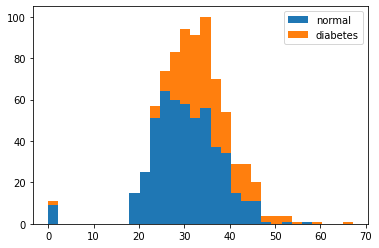

In [ ]:
df['diabetes'].value_counts()
df.describe()
df.corr()

#plt.hist(x = [df.plasma[df.diabetes == 0], df.plasma[df.diabetes == 1]], bins = 30, histtype = 'barstacked', label = ['normal', 'diabetes'])

#bmi 와 당뇨의 관계성성
plt.hist(x = [df.bmi[df.diabetes == 0], df.bmi[df.diabetes == 1]], bins = 30, histtype = 'barstacked', label = ['normal', 'diabetes'])
plt.legend()
plt.show()

In [ ]:
# 모델 구현하기
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense 

drive.mount('/content/drive')

df = pd.read_csv('./drive/MyDrive/Colab Notebooks/data/pima.csv')
X = df.iloc[:, 0:8]  # column 0 - 7
y = df.iloc[:, 8] 

model = Sequential()
model.add(Dense(12, input_dim = 8, activation = 'relu', name = 'Dense_1'))
model.add(Dense(8, activation = 'relu', name = 'Dense_2'))
model.add(Dense(1, activation = 'sigmoid', name = 'Dense_3'))
model.summary()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Dense_1 (Dense)             (None, 12)                108       
                                                                 
 Dense_2 (Dense)             (None, 8)                 104       
                                                                 
 Dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________


모델을 바궈가면서 학습을 해보자!!

In [ ]:
# 모델 학습 시키기기
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.fit(X, y, epochs = 300, batch_size = 10)

Epoch 1/300
77/77 [==============================] - 1s 3ms/step - loss: 0.4669 - accuracy: 0.7812
Epoch 2/300
77/77 [==============================] - 0s 3ms/step - loss: 0.4618 - accuracy: 0.7891
Epoch 3/300
77/77 [==============================] - 0s 3ms/step - loss: 0.4605 - accuracy: 0.7799
Epoch 4/300
77/77 [==============================] - 0s 3ms/step - loss: 0.4588 - accuracy: 0.7852
Epoch 5/300
77/77 [==============================] - 0s 3ms/step - loss: 0.4576 - accuracy: 0.7786
Epoch 6/300
77/77 [==============================] - 0s 3ms/step - loss: 0.4604 - accuracy: 0.7891
Epoch 7/300
77/77 [==============================] - 0s 3ms/step - loss: 0.4616 - accuracy: 0.7734
Epoch 8/300
77/77 [==============================] - 0s 3ms/step - loss: 0.4596 - accuracy: 0.7852
Epoch 9/300
77/77 [==============================] - 0s 3ms/step - loss: 0.4566 - accuracy: 0.7799
Epoch 10/300
77/77 [==============================] - 0s 3ms/step - loss: 0.4564 - accuracy: 0.7812
Epoch 11/

In [ ]:
#아이리스 분류

import pandas as pd
from google.colab import drive

drive.mount('/content/drive')
df = pd.read_csv('./drive/MyDrive/Colab Notebooks/data/iris3.csv')
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa

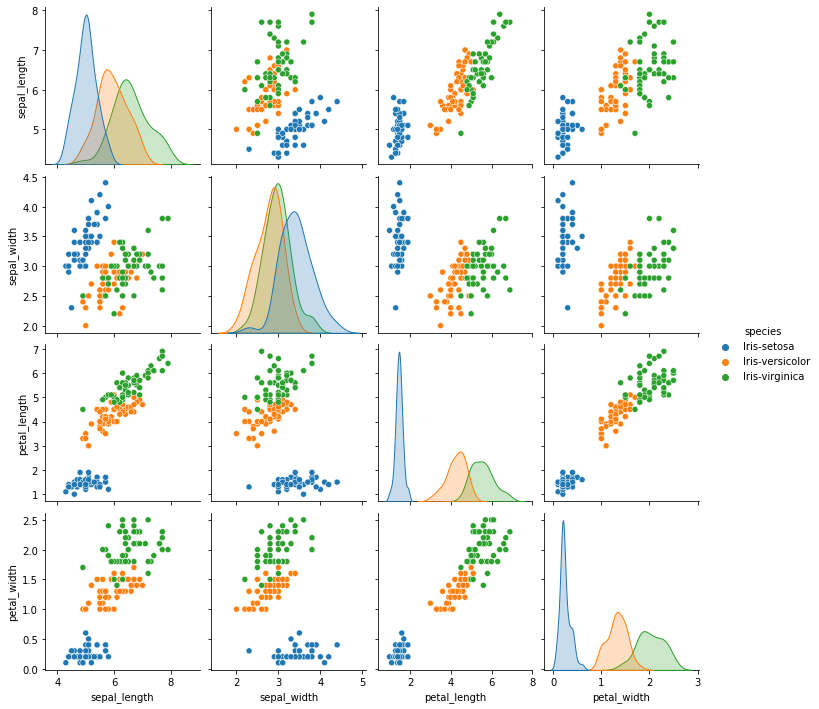

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

#페어플랏랏
sns.pairplot(df, hue = 'species')
plt.show()

In [ ]:
X = df.iloc[:, 0:4]
y = df.iloc[:, 4]
print(X[0:5]) #입력
print(y[0:5]) #답

   sepal_length  sepal_width  petal_length  petal_width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2
0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: species, dtype: object


In [ ]:
#원핫 인코딩으로 라벨을 새롭게 바꿔주자자

X = df.iloc[:, 0:4]
y = df.iloc[:, 4]
y = pd.get_dummies(y) # one-hot encoding for y
print(X[0:5])
print(y[0:5])

   sepal_length  sepal_width  petal_length  petal_width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2
   Iris-setosa  Iris-versicolor  Iris-virginica
0            1                0               0
1            1                0               0
2            1                0               0
3            1                0               0
4            1                0               0


In [ ]:
#모델 구현하기
model = Sequential()
model.add(Dense(12, input_dim = 4, activation = 'relu'))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(3, activation = 'softmax'))
model.summary()

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.fit(X, y, epochs = 100, batch_size = 10)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 12)                60        
                                                                 
 dense_7 (Dense)             (None, 8)                 104       
                                                                 
 dense_8 (Dense)             (None, 3)                 27        
                                                                 
Total params: 191
Trainable params: 191
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
15/15 [==============================] - 1s 3ms/step - loss: 1.5683 - accuracy: 0.6200
Epoch 2/100
15/15 [==============================] - 0s 3ms/step - loss: 1.2707 - accuracy: 0.6667
Epoch 3/100
15/15 [==============================] - 0s 2ms/step - loss: 1.0614 - accuracy: 0.6667
Epoch 4/100
15/15 [====